Nama : Nadia Sukesi Sianipar\
NPM : 2106700776


# PRE-PROCESSING

## Import Modul

In [ ]:
import numpy as np # linear algebra
import os
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti 'namafile.xlsx' dengan nama file Anda di Google Drive
data = '/content/drive/MyDrive/Stat QC/Garis Kemiskinan Menurut Kabupaten_Kota 2019-2023.xlsx'
ukuran = '/content/drive/MyDrive/Stat QC/x-bar-r.xlsx'
# Membaca file Excel
df = pd.read_excel(data)
df1 = pd.read_excel(ukuran)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfs = pd.read_excel(data, usecols=['Tahun 2019','Tahun 2020','Tahun 2021','Tahun 2022','Tahun 2023'])

In [ ]:
# Menampilkan beberapa baris pertama dari dataframe
print(df.head())

         Wilayah  Tahun 2019  Tahun 2020  Tahun 2021  Tahun 2022  Tahun 2023
0           ACEH      486935      522126      541109      579227      627534
1       Simeulue      404739      444754      458896      493303      538693
2   Aceh Singkil      450217      473983      487249      518951      568691
3   Aceh Selatan      369107      405786      418689      446224      494565
4  Aceh Tenggara      357015      392493      404725      430825      471301


In [ ]:
# Menampilkan beberapa baris pertama dari tabel ukuran yang akan digunakan
print(df1.head())

   Sample_Size     A2     d2   D3     D4
0            2  1.880  1.128  0.0  3.267
1            3  1.023  1.693  0.0  2.574
2            4  0.729  2.059  0.0  2.282
3            5  0.577  2.326  0.0  2.114
4            6  0.483  2.534  0.0  2.004


## Analisis Deskriptif and Visualisasi

In [ ]:
df.describe()

,Tahun 2019,Tahun 2020,Tahun 2021,Tahun 2022,Tahun 2023
count,548.000000,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,416462.686131,4.447421e+05,4.638927e+05,4.937062e+05,5.351946e+05
std,101159.003128,1.068246e+05,1.109558e+05,1.166011e+05,1.235978e+05
min,235654.000000,2.481840e+05,2.538770e+05,2.646660e+05,2.902030e+05
25%,342226.000000,3.656400e+05,3.806308e+05,4.077020e+05,4.424072e+05
50%,391578.000000,4.225370e+05,4.406395e+05,4.725090e+05,5.134520e+05
75%,465315.750000,4.981728e+05,5.194238e+05,5.528855e+05,6.004872e+05
max,992610.000000,1.021759e+06,1.051297e+06,1.099019e+06,1.147265e+06


### Line Plot

Menampilkan tren untuk setiap wilayah akan sulit dilakukan dalam satu plot, karena ada 548 wilayah. Sebagai gantinya penulis memilih 5 wilayah secara acak untuk melihat tren garis kemiskinan.

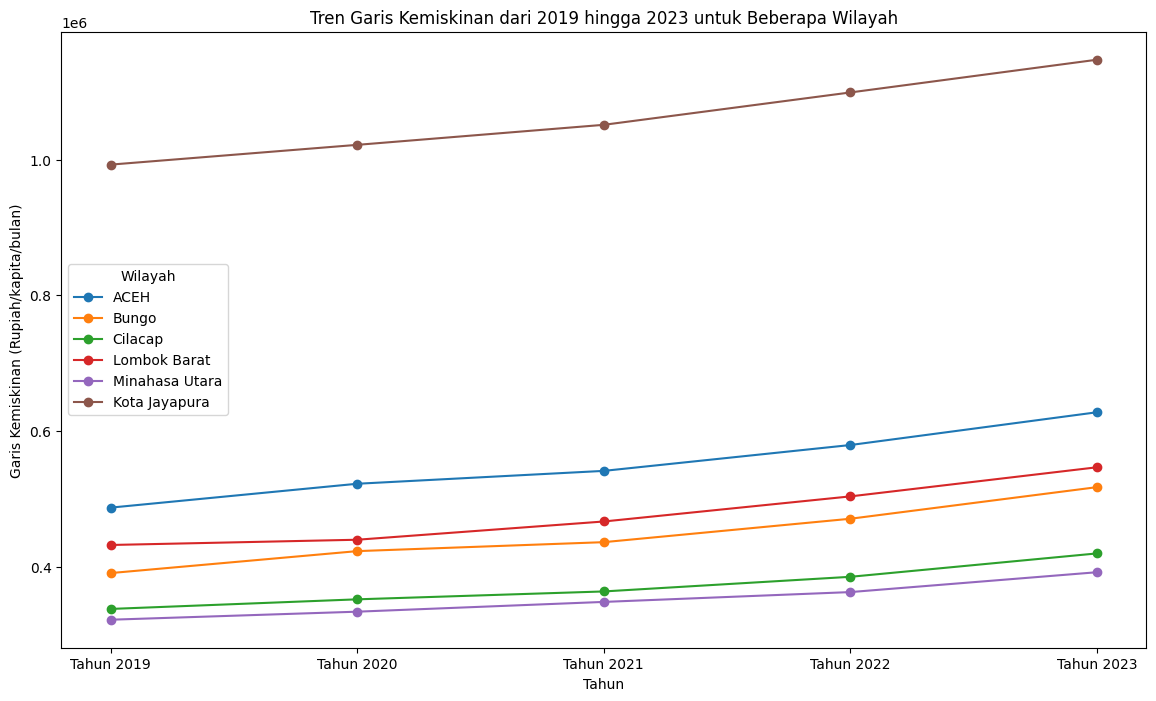

In [ ]:
# Memilih beberapa wilayah random untuk ditampilkan
selected_wilayah = df.iloc[[0, 100, 200, 300, 400, 547]]
# Plot line plot
plt.figure(figsize=(14, 8))
for i, row in selected_wilayah.iterrows():
    plt.plot(['Tahun 2019', 'Tahun 2020', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023'], row[1:], marker='o', label=row['Wilayah'])

plt.title('Tren Garis Kemiskinan dari 2019 hingga 2023 untuk Beberapa Wilayah')
plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan (Rupiah/kapita/bulan)')
plt.legend(title='Wilayah')
plt.show()

### Box Plot

Box plot dapat membantu memahami distribusi garis kemiskinan di berbagai tahun.

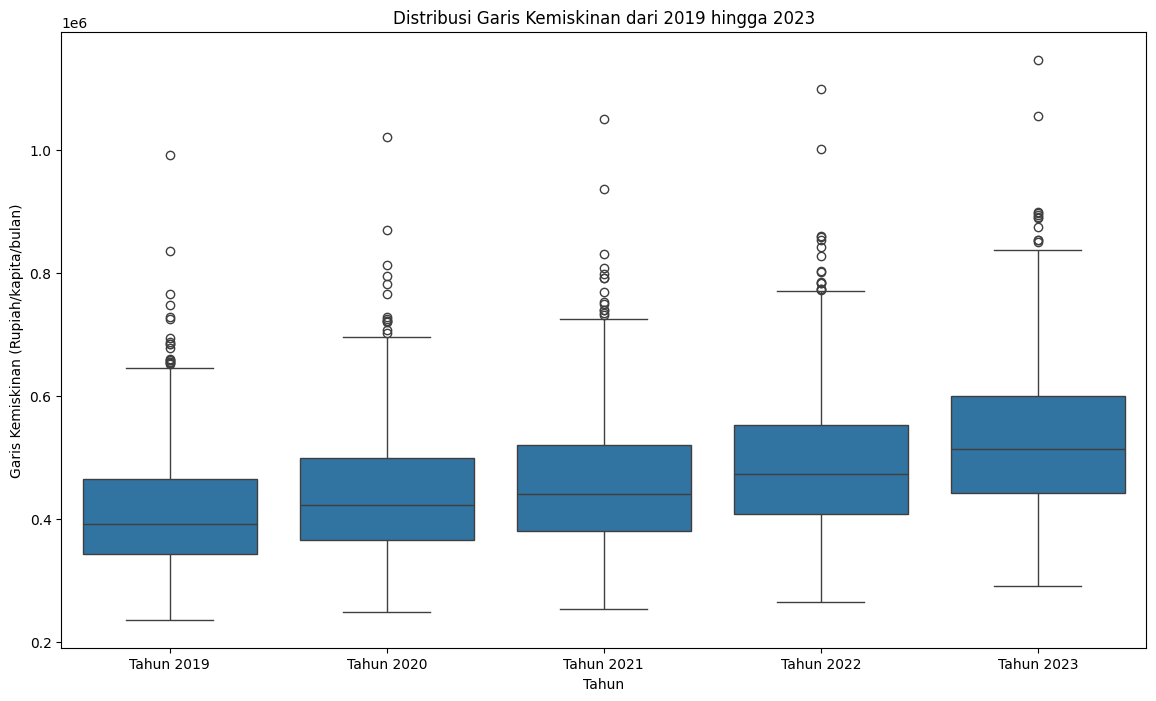

In [ ]:
# Mengubah data untuk box plot
df_melted = pd.melt(df, id_vars=['Wilayah'], value_vars=['Tahun 2019', 'Tahun 2020', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023'], var_name='Tahun', value_name='Garis Kemiskinan')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Tahun', y='Garis Kemiskinan', data=df_melted)

plt.title('Distribusi Garis Kemiskinan dari 2019 hingga 2023')
plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan (Rupiah/kapita/bulan)')
plt.show()


## Diagram Batang

Diagram ini digunakan untuk menunjukkan wilayah dengan angka garis kemiskinan terendah dan tertinggi tiap tahun nya (2019 - 2023) di Indonesia.

         Year          Lowest        Highest  Lowest Value  Highest Value
0  Tahun 2019  Konawe Selatan  Kota Jayapura        235654         992610
1  Tahun 2020   Buton Selatan  Kota Jayapura        248184        1021759
2  Tahun 2021   Buton Selatan  Kota Jayapura        253877        1051297
3  Tahun 2022   Buton Selatan  Kota Jayapura        264666        1099019
4  Tahun 2023   Buton Selatan  Kota Jayapura        290203        1147265


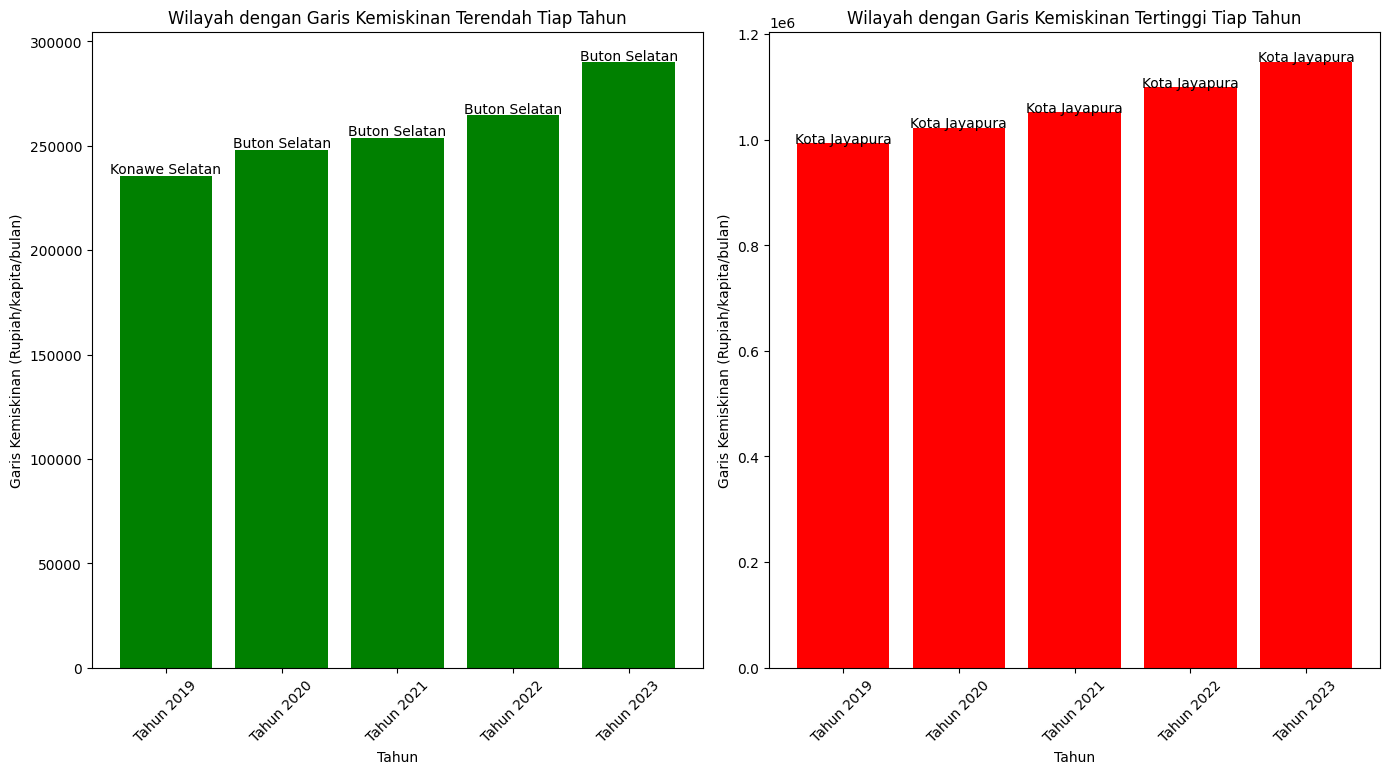

In [ ]:
# Mengidentifikasi wilayah dengan angka garis kemiskinan terendah dan tertinggi tiap tahunnya
years = ['Tahun 2019', 'Tahun 2020', 'Tahun 2021', 'Tahun 2022', 'Tahun 2023']
lowest_highest = {'Year': [], 'Lowest': [], 'Highest': [], 'Lowest Value': [], 'Highest Value': []}

for year in years:
    lowest = df.loc[df[year].idxmin()]
    highest = df.loc[df[year].idxmax()]
    lowest_highest['Year'].append(year)
    lowest_highest['Lowest'].append(lowest['Wilayah'])
    lowest_highest['Highest'].append(highest['Wilayah'])
    lowest_highest['Lowest Value'].append(lowest[year])
    lowest_highest['Highest Value'].append(highest[year])

# Membuat DataFrame dari hasil identifikasi
df_low_high = pd.DataFrame(lowest_highest)

# Menampilkan wilayah dengan garis kemiskinan terendah dan tertinggi tiap tahun
print(df_low_high)

# Visualisasi
plt.figure(figsize=(14, 8))

# Bar plot untuk wilayah dengan angka garis kemiskinan terendah
plt.subplot(1, 2, 1)
plt.bar(df_low_high['Year'], df_low_high['Lowest Value'], color='green')
plt.xticks(rotation=45)
plt.title('Wilayah dengan Garis Kemiskinan Terendah Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan (Rupiah/kapita/bulan)')
for i, v in enumerate(df_low_high['Lowest Value']):
    plt.text(i, v + 1000, df_low_high['Lowest'][i], ha='center', color='black')

# Bar plot untuk wilayah dengan angka garis kemiskinan tertinggi
plt.subplot(1, 2, 2)
plt.bar(df_low_high['Year'], df_low_high['Highest Value'], color='red')
plt.xticks(rotation=45)
plt.title('Wilayah dengan Garis Kemiskinan Tertinggi Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan (Rupiah/kapita/bulan)')
for i, v in enumerate(df_low_high['Highest Value']):
    plt.text(i, v + 1000, df_low_high['Highest'][i], ha='center', color='black')

plt.tight_layout()
plt.show()


# Analisis Data Menggunakan Bagan Kendali

##MEAN AND RANGE

In [ ]:
xbar = []
r = []
for i in range(len(df)):
    x = (df['Tahun 2019'][i]+df['Tahun 2020'][i]+df['Tahun 2021'][i]+df['Tahun 2022'][i]+df['Tahun 2023'][i])/5
    rang = max(dfs.loc[i]) - min(dfs.loc[i])
    xbar.append(x)
    r.append(rang)

In [ ]:
data_xr = {'Wilayah':df['Wilayah'],'Tahun 2019':df['Tahun 2019'],'Tahun 2020':df['Tahun 2020'],'Tahun 2021':df['Tahun 2021'],'Tahun 2022':df['Tahun 2022'],'Tahun 2023':df['Tahun 2023'],'Xbar':xbar,'R':r,}
dxr = pd.DataFrame(data_xr)
dxr

,Wilayah,Tahun 2019,Tahun 2020,Tahun 2021,Tahun 2022,Tahun 2023,Xbar,R
0,ACEH,486935,522126,541109,579227,627534,551386.2,140599
1,Simeulue,404739,444754,458896,493303,538693,468077.0,133954
2,Aceh Singkil,450217,473983,487249,518951,568691,499818.2,118474
3,Aceh Selatan,369107,405786,418689,446224,494565,426874.2,125458
4,Aceh Tenggara,357015,392493,404725,430825,471301,411271.8,114286
...,...,...,...,...,...,...,...,...
543,Puncak,630074,664865,721541,754778,836828,721617.2,206754
544,Dogiyai,492905,512654,557009,592213,653007,561557.6,160102
545,Intan Jaya,627128,662465,725106,769993,853098,727558.0,225970
546,Deiyai,579263,608868,627742,647902,709749,634704.8,130486


In [ ]:
clx = sum(xbar)/len(df)
clr = sum(r)/len(df)

print(clx)
print(clr)

470799.6536496352
118731.89781021897


## Bagan X




### Batas Atas dan Bawah

In [ ]:
uclx,lclx = [],[]
Uclx = clx + df1.loc[3]['A2']*clr
Lclx = clx - df1.loc[3]['A2']*clr

for k in range(len(df)):
    uclx.append(Uclx)
    lclx.append(Lclx)

### Wilayah

In [ ]:
data_xbar = {'Wilayah':df['Wilayah'],'Xbar':xbar,'UCL':uclx,'LCL':lclx,'CL':clx}
dfx = pd.DataFrame(data_xbar)
dfx

,Wilayah,Xbar,UCL,LCL,CL
0,ACEH,551386.2,539307.958686,402291.348613,470799.65365
1,Simeulue,468077.0,539307.958686,402291.348613,470799.65365
2,Aceh Singkil,499818.2,539307.958686,402291.348613,470799.65365
3,Aceh Selatan,426874.2,539307.958686,402291.348613,470799.65365
4,Aceh Tenggara,411271.8,539307.958686,402291.348613,470799.65365
...,...,...,...,...,...
543,Puncak,721617.2,539307.958686,402291.348613,470799.65365
544,Dogiyai,561557.6,539307.958686,402291.348613,470799.65365
545,Intan Jaya,727558.0,539307.958686,402291.348613,470799.65365
546,Deiyai,634704.8,539307.958686,402291.348613,470799.65365


### Plot 1

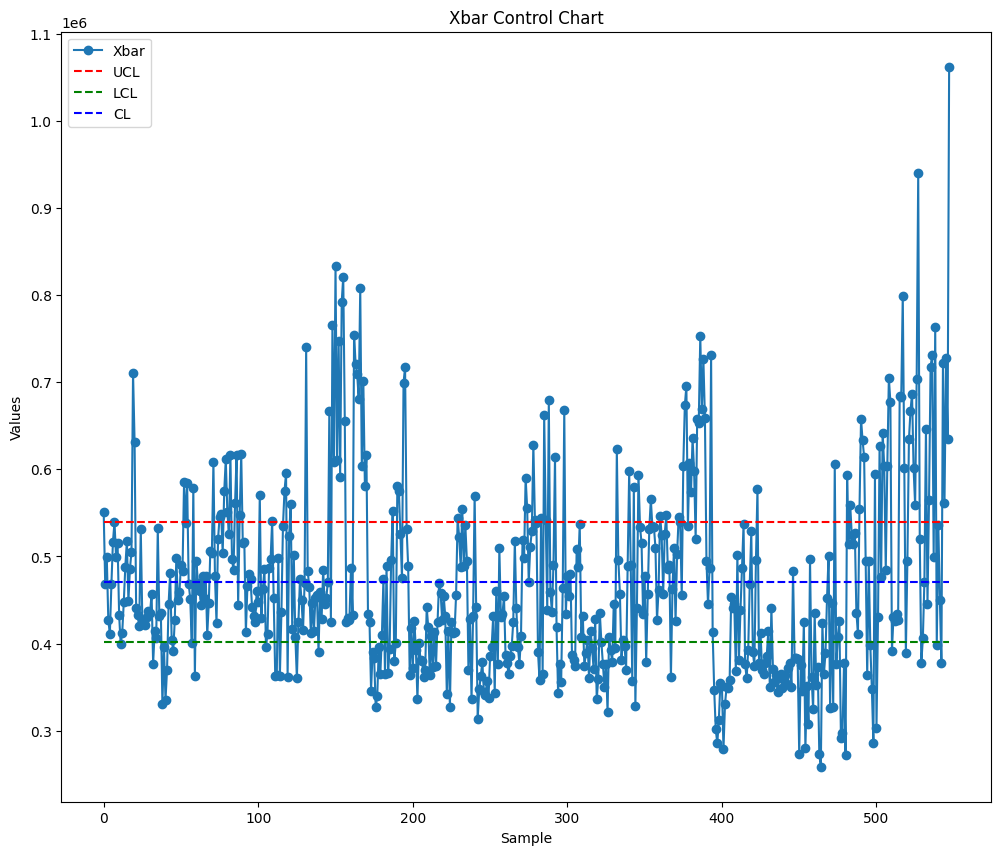

In [ ]:
# Membuat plot
plt.figure(figsize=(12, 10))

# Plot Xbar
plt.plot(dfx['Xbar'], marker='o', label='Xbar')

# Plot UCL
plt.plot(dfx['UCL'], linestyle='--', color='r', label='UCL')

# Plot LCL
plt.plot(dfx['LCL'], linestyle='--', color='g', label='LCL')

# Plot CL
plt.plot( dfx['CL'], linestyle='--', color='b', label='CL')

# Menambahkan judul dan label
plt.title('Xbar Control Chart')
plt.xlabel('Sample')
plt.ylabel('Values')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
chart_x=plt.show()

## Bagan Kendali X (Setelah Drop Data Pertama)

---



In [ ]:
# Memfilter data yang melebihi batas UCL dan LCL
out_of_control = dfx[(dfx['Xbar'] > dfx['UCL']) | (dfx['Xbar'] < dfx['LCL'])]

# Mencetak data yang melebihi batas UCL dan LCL
print("Data yang melebihi batas UCL dan LCL:")
print(out_of_control)

Data yang melebihi batas UCL dan LCL:
             Wilayah       Xbar            UCL            LCL            CL
0               ACEH   551386.2  539307.958686  402291.348613  470799.65365
7         Aceh Barat   539352.6  539307.958686  402291.348613  470799.65365
11        Aceh Utara   399327.6  539307.958686  402291.348613  470799.65365
19   Kota Banda Aceh   710726.6  539307.958686  402291.348613  470799.65365
20       Kota Sabang   631774.6  539307.958686  402291.348613  470799.65365
..               ...        ...            ...            ...           ...
543           Puncak   721617.2  539307.958686  402291.348613  470799.65365
544          Dogiyai   561557.6  539307.958686  402291.348613  470799.65365
545       Intan Jaya   727558.0  539307.958686  402291.348613  470799.65365
546           Deiyai   634704.8  539307.958686  402291.348613  470799.65365
547    Kota Jayapura  1062390.0  539307.958686  402291.348613  470799.65365

[285 rows x 5 columns]


In [ ]:
# Menampilkan isi kolom 'Wilayah' yang out of control
print("Wilayah yang out of control:")
print(out_of_control['Wilayah'].values)

Wilayah yang out of control:
['ACEH' 'Aceh Barat' 'Aceh Utara' 'Kota Banda Aceh' 'Kota Sabang' 'Asahan'
 'Nias Selatan' 'Humbang Hasundutan' 'Pakpak Bharat' 'Samosir'
 'Padang Lawas' 'Kota Pematang Siantar' 'Kota Medan' 'Kota Gunungsitoli'
 'SUMATERA BARAT' 'Kepulauan Mentawai' 'Kota Padang' 'Kota Bukittinggi'
 'Kota Payakumbuh' 'RIAU' 'Kuantan Singingi' 'Indragiri Hulu' 'Pelalawan'
 'Rokan Hulu' 'Bengkalis' 'Kepulauan Meranti' 'Kota Pekanbaru'
 'Kota Jambi' 'Ogan Komering Ilir' 'Musi Banyuasin'
 'Ogan Komering Ulu Selatan' 'Ogan Komering Ulu Timur' 'Empat Lawang'
 'Kota Palembang' 'Kota Prabumulih' 'Kota Pagar Alam' 'BENGKULU' 'Kaur'
 'Kota Bengkulu' 'Way Kanan' 'Kota Bandar Lampung' 'KEP. BANGKA BELITUNG'
 'Bangka' 'Belitung' 'Bangka Barat' 'Bangka Tengah' 'Bangka Selatan'
 'Belitung Timur' 'Kota Pangkal Pinang' 'KEPULAUAN RIAU' 'Kota Batam'
 'Kota Tanjung Pinang' 'DKI JAKARTA' 'Kepulauan Seribu'
 'Kota Jakarta Selatan' 'Kota Jakarta Timur' 'Kota Jakarta Pusat'
 'Kota Jakarta Barat' 

In [ ]:
dfxc = dxr
# Menghapus baris data yang di luar kendali
dfx_cleaned = dfxc.drop(out_of_control.index)

# Mengatur ulang indeks
dfx_cleaned.reset_index(drop=True, inplace=True)

# Dataframe setelah penghapusan
print("\nData setelah penghapusan:")
print(dfx_cleaned)



Data setelah penghapusan:
              Wilayah  Tahun 2019  Tahun 2020  Tahun 2021  Tahun 2022  \
0            Simeulue      404739      444754      458896      493303   
1        Aceh Singkil      450217      473983      487249      518951   
2        Aceh Selatan      369107      405786      418689      446224   
3       Aceh Tenggara      357015      392493      404725      430825   
4          Aceh Timur      417715      440455      460422      491550   
..                ...         ...         ...         ...         ...   
258          Yahukimo      414936      428433      466113      496222   
259          Tolikara      382936      404812      441994      472692   
260           Supiori      447524      471401      498615      526482   
261        Lanny Jaya      464328      490508      537322      564670   
262  Mamberamo Tengah      388619      412574      449409      475436   

     Tahun 2023      Xbar       R  
0        538693  468077.0  133954  
1        568691  499818.

In [ ]:
clx = sum(dfx_cleaned['Xbar']) / len(dfx_cleaned)
clr = sum(dfx_cleaned['R']) / len(dfx_cleaned)

print(clx)
print(clr)

uclx,lclx = [],[]
Uclx = clx + df1.loc[3]['A2']*clr
Lclx = clx - df1.loc[3]['A2']*clr

for k in range(len(dfx_cleaned)):
    uclx.append(Uclx)
    lclx.append(Lclx)

463338.8539923955
120452.45627376426


In [ ]:
data_xbar = {'Wilayah':dfx_cleaned['Wilayah'],'Xbar':dfx_cleaned['Xbar'],'UCL':uclx,'LCL':lclx,'CL':clx}
dfxc = pd.DataFrame(data_xbar)
dfxc

,Wilayah,Xbar,UCL,LCL,CL
0,Simeulue,468077.0,532839.921262,393837.786722,463338.853992
1,Aceh Singkil,499818.2,532839.921262,393837.786722,463338.853992
2,Aceh Selatan,426874.2,532839.921262,393837.786722,463338.853992
3,Aceh Tenggara,411271.8,532839.921262,393837.786722,463338.853992
4,Aceh Timur,468215.2,532839.921262,393837.786722,463338.853992
...,...,...,...,...,...
258,Yahukimo,471095.2,532839.921262,393837.786722,463338.853992
259,Tolikara,445640.8,532839.921262,393837.786722,463338.853992
260,Supiori,499795.2,532839.921262,393837.786722,463338.853992
261,Lanny Jaya,536501.0,532839.921262,393837.786722,463338.853992


### Plot 2

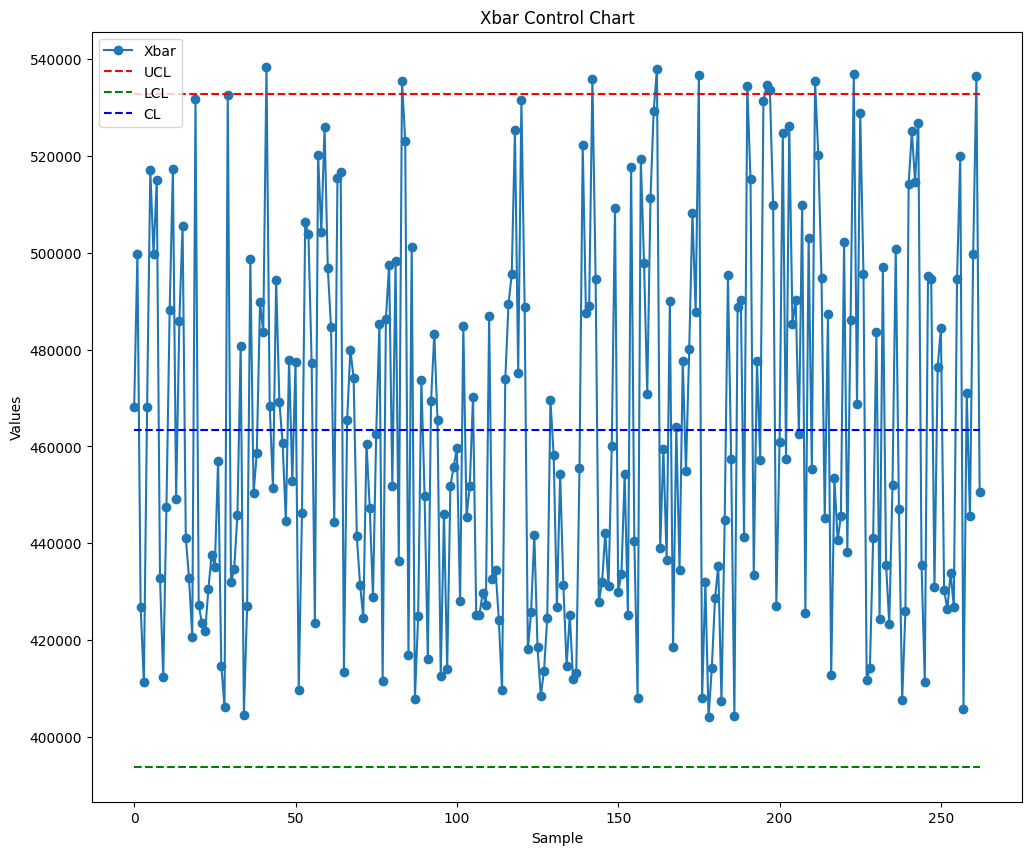

In [ ]:
# Membuat plot
plt.figure(figsize=(12, 10))

# Plot Xbar
plt.plot(dfxc['Xbar'], marker='o', label='Xbar')

# Plot UCL
plt.plot(dfxc['UCL'], linestyle='--', color='r', label='UCL')

# Plot LCL
plt.plot(dfxc['LCL'], linestyle='--', color='g', label='LCL')

# Plot CL
plt.plot(dfxc['CL'], linestyle='--', color='b', label='CL')

# Menambahkan judul dan label
plt.title('Xbar Control Chart')
plt.xlabel('Sample')
plt.ylabel('Values')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
chart_x=plt.show()

In [ ]:
# Memfilter data yang melebihi batas UCL dan LCL
out_of_control = dfxc[(dfxc['Xbar'] > dfxc['UCL']) | (dfxc['Xbar'] < dfxc['LCL'])]

# Mencetak data yang melebihi batas UCL dan LCL
print("Data yang melebihi batas UCL dan LCL:")
print(out_of_control)

Data yang melebihi batas UCL dan LCL:
                Wilayah      Xbar            UCL            LCL             CL
41   Kota Tebing Tinggi  538466.8  532839.921262  393837.786722  463338.853992
83     Musi Rawas Utara  535465.8  532839.921262  393837.786722  463338.853992
142          Kota Tegal  535986.8  532839.921262  393837.786722  463338.853992
162              BANTEN  538053.8  532839.921262  393837.786722  463338.853992
175        Kota Mataram  536844.4  532839.921262  393837.786722  463338.853992
190     Kota Singkawang  534400.6  532839.921262  393837.786722  463338.853992
196            Lamandau  534643.0  532839.921262  393837.786722  463338.853992
197             Seruyan  533672.4  532839.921262  393837.786722  463338.853992
211               Paser  535443.2  532839.921262  393837.786722  463338.853992
223                Poso  536883.0  532839.921262  393837.786722  463338.853992
261          Lanny Jaya  536501.0  532839.921262  393837.786722  463338.853992


In [ ]:
# Menampilkan isi kolom 'Wilayah' yang out of control
print("Wilayah yang out of control:")
print(out_of_control['Wilayah'].values)

Wilayah yang out of control:
['Kota Tebing Tinggi' 'Musi Rawas Utara' 'Kota Tegal' 'BANTEN'
 'Kota Mataram' 'Kota Singkawang' 'Lamandau' 'Seruyan' 'Paser' 'Poso'
 'Lanny Jaya']


## Bagan R

### Batas Atas dan Batas Bawah

In [ ]:
uclr,lclr = [],[]
Uclr = clr * df1.loc[3]['D4']
Lclr = clr * df1.loc[3]['D3']

for l in range(len(df)):
    uclr.append(Uclr)
    lclr.append(Lclr)

### Tabel

In [ ]:
data_r = {'Wilayah':df['Wilayah'],'R':r,'UCL':uclr,'LCL':lclr,'CL':clr}
dfr = pd.DataFrame(data_r)
dfr

,Wilayah,R,UCL,LCL,CL
0,ACEH,140599,254636.492563,0.0,120452.456274
1,Simeulue,133954,254636.492563,0.0,120452.456274
2,Aceh Singkil,118474,254636.492563,0.0,120452.456274
3,Aceh Selatan,125458,254636.492563,0.0,120452.456274
4,Aceh Tenggara,114286,254636.492563,0.0,120452.456274
...,...,...,...,...,...
543,Puncak,206754,254636.492563,0.0,120452.456274
544,Dogiyai,160102,254636.492563,0.0,120452.456274
545,Intan Jaya,225970,254636.492563,0.0,120452.456274
546,Deiyai,130486,254636.492563,0.0,120452.456274


### Plot

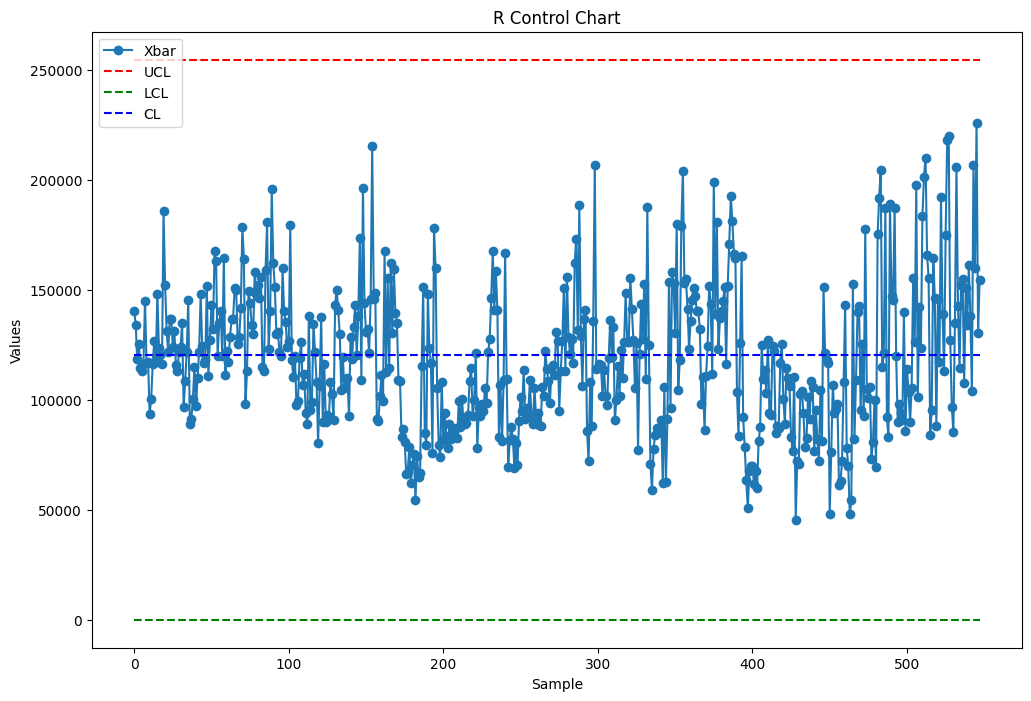

In [ ]:
# Membuat plot
plt.figure(figsize=(12, 8))

# Plot Xbar
plt.plot(dfr['R'], marker='o', label='Xbar')

# Plot UCL
plt.plot( dfr['UCL'], linestyle='--', color='r', label='UCL')

# Plot LCL
plt.plot( dfr['LCL'], linestyle='--', color='g', label='LCL')

# Plot CL
plt.plot( dfr['CL'], linestyle='--', color='b', label='CL')

# Menambahkan judul dan label
plt.title('R Control Chart')
plt.xlabel('Sample')
plt.ylabel('Values')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
chart_r=plt.show()

## Capability Process

In [ ]:
s = clr/df1.loc[3]['d2']
usl = 539307.958686
lsl = 402291.348613

print('Mean : ',clx)
print('Sigma : ',s)
print('Upper Specification Limit : ',usl)
print('Lower Specification Limit : ',lsl)

Mean :  463338.8539923955
Sigma :  51785.23485544465
Upper Specification Limit :  539307.958686
Lower Specification Limit :  402291.348613


In [ ]:
cp = (usl - lsl) / (6 * s)
cpu = (usl - clx) / (3 * s)
cpl = (clx - lsl) / (3 * s)

print('Capability Process : ',cp)
print('Capability Process (Upper) : ',cpu)
print('Capability Process (Lower) : ',cpl)

Capability Process :  0.44097708048595163
Capability Process (Upper) :  0.48900106311298713
Capability Process (Lower) :  0.3929530978589162


In [ ]:
cpk = min(cpu,cpl)
cr = 1/cp

print('Capability Process Index : ',cpk)
print(f'Capability Ratio : {cr*100} %')

Capability Process Index :  0.3929530978589162
Capability Ratio : 226.76915519010913 %


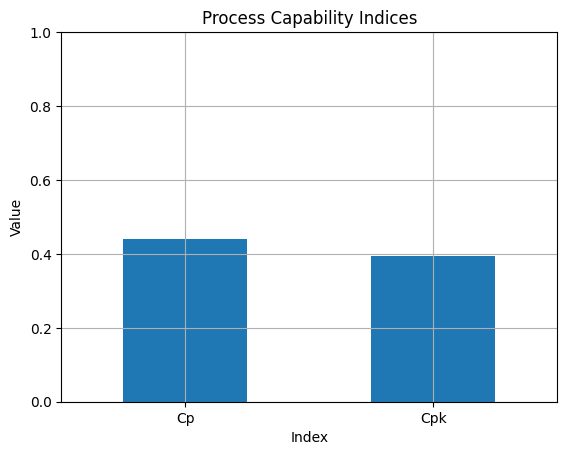

,Value
Index,
Cp,0.440977
Cpk,0.392953


In [ ]:
# Compile the capability indices into a DataFrame
capability_indices = pd.DataFrame({
    'Index': ['Cp', 'Cpk'],
    'Value': [cp, cpk]
})

# Display the process capability indices
capability_indices.set_index('Index', inplace=True)
capability_indices.plot(kind='bar', legend=False)
plt.title('Process Capability Indices')
plt.ylabel('Value')
plt.xlabel('Index')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

capability_indices